[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Jumlah data: (20620, 2)
class
1    19190
0     1430
Name: count, dtype: int64


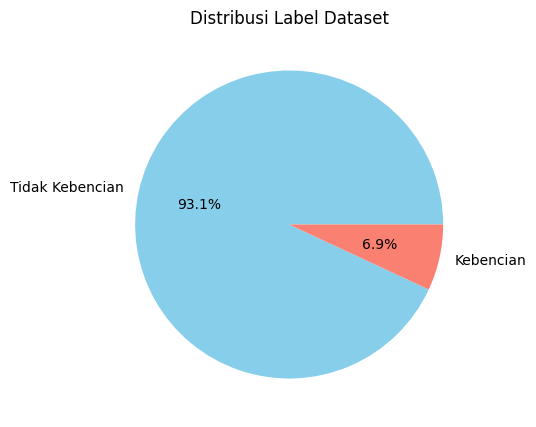

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               tweet  \
0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
2  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
3  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
4  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   

                                          clean_text  
0  rt boy dats coldtyga dwn bad cuffin dat hoe st...  
1  rt dawg rt ever fuck bitch start cry confused ...  
2                                rt look like tranny  
3  rt shit hear might true might faker bitch told ya  
4  shit blows meclaim faithful somebody still fuc...  
Data latih: (16496, 5000)
Data uji: (4124, 5000)
=== Evaluasi Model ===
Akurasi  : 0.9331
Presisi  : 0.9369
Recall   : 0.9950
F1-Score : 0.9651

                 precision    recall  f1-score   support

Tidak Kebencian       0.60      0.10      0.17       286
      Kebencian       0.94      1.00      0.97      3838

       accuracy

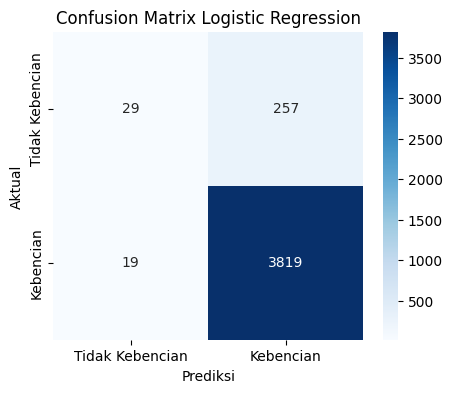

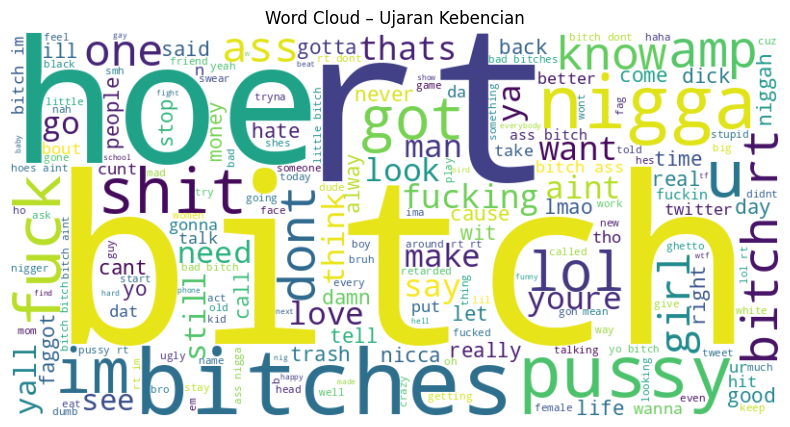

In [5]:
# ======================================
# LANGKAH 1 – DATASET
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
)
from wordcloud import WordCloud

nltk.download('stopwords')

# Membaca dataset (ubah path jika perlu)
df = pd.read_csv('/content/1761794597346_Dataset+Ujaran.csv')

# Hanya gunakan dua label: 0 = tidak mengandung kebencian, 1 = mengandung kebencian
# Jika dataset kamu punya label 0,1,2 -> kita ubah jadi biner
df = df[df['class'].isin([0,1])].reset_index(drop=True)

print("Jumlah data:", df.shape)
print(df['class'].value_counts())

# Visualisasi distribusi label
plt.figure(figsize=(5,5))
plt.pie(df['class'].value_counts(), labels=['Tidak Kebencian','Kebencian'], autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title("Distribusi Label Dataset")
plt.show()

# ======================================
# LANGKAH 2 – PREPROCESSING TEKS
# ======================================
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # ganti ke 'indonesian' jika dataset bahasa Indonesia

def clean_text(text):
    text = text.lower()  # case folding
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)  # hapus URL, mention, hashtag
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = " ".join([word for word in text.split() if word not in stop_words])  # hapus stopwords
    return text.strip()

df['clean_text'] = df['tweet'].astype(str).apply(clean_text)
print(df[['tweet','clean_text']].head())

# ======================================
# LANGKAH 3 – REPRESENTASI FITUR (TF-IDF)
# ======================================
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

# ======================================
# LANGKAH 4 – PEMBANGUNAN MODEL (Logistic Regression)
# ======================================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# ======================================
# LANGKAH 5 – EVALUASI MODEL
# ======================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Evaluasi Model ===")
print(f"Akurasi  : {acc:.4f}")
print(f"Presisi  : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}\n")

# Classification report
print(classification_report(y_test, y_pred, target_names=['Tidak Kebencian','Kebencian']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Kebencian','Kebencian'], yticklabels=['Tidak Kebencian','Kebencian'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# ======================================
# LANGKAH 6 – VISUALISASI DAN LAPORAN
# ======================================
# WordCloud ujaran kebencian
hate_text = " ".join(df[df['class']==1]['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(hate_text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Ujaran Kebencian")
plt.show()
